Train: X=(48000, 28, 28), y=(48000,)
Test: X=(12000, 28, 28), y=(12000,)


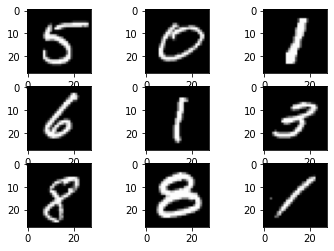

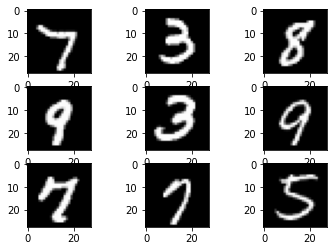

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Load the data from the CSV file
data = pd.read_csv('mnist_train.csv')
labels = data['label']
images = data.drop('label', axis=1)

# Reshape the data into 28x28 images
images = np.array(images).reshape((-1, 28, 28))

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42)

print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

# Display the first 9 training images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
plt.show()

# Display the first 9 test images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(test_images[i], cmap=plt.get_cmap('gray'))
plt.show()


In [12]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [13]:
def load_dataset():
  # Load the data from the CSV file
  data = pd.read_csv('mnist_train.csv')
  labels = data['label']
  images = data.drop('label', axis=1)
  # Reshape the data into 28x28 images
  images = np.array(images).reshape((-1, 28, 28))
  # Split the data into training and testing sets
  trainX, testX, trainY, testY = train_test_split(images, labels, test_size=0.2, random_state=42)
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

In [14]:
def prep_pixels(train, test):
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

In [15]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [16]:
def train():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	model = define_model()
	model.fit(trainX, trainY, epochs=2, batch_size=64, verbose=1)
	model.save('final_model.h5')
 
train()

Epoch 1/2
750/750 [==============================] - 23s 30ms/step - loss: 0.1687 - accuracy: 0.9487
Epoch 2/2
750/750 [==============================] - 22s 30ms/step - loss: 0.0532 - accuracy: 0.9836


In [17]:
from keras.datasets import mnist
from keras.models import load_model
from tensorflow.keras.utils import to_categorical

In [18]:
def testing():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
	model = load_model('final_model.h5')
	_, acc = model.evaluate(testX, testY, verbose=1)
	print('> %.3f' % (acc * 100.0))
 
testing()

375/375 [==============================] - 2s 4ms/step - loss: 0.0549 - accuracy: 0.9826
> 98.258


In [19]:
from numpy import argmax
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
 


In [20]:
def load_image(filename):
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	img = img / 255.0
	return img
 

In [21]:
def run_example():
	img = load_image('sample_image.png')
	model = load_model('final_model.h5')
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	print("Predicted Value: ",digit)
 
run_example()

Predicted Value:  7


c:\Users\kusha\AppData\Local\Programs\Python\Python39\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [22]:
import tkinter as tk
import cv2
import numpy as np
from keras.models import load_model
from tensorflow.keras.utils import to_categorical

# Constants
CANVAS_WIDTH = 200
CANVAS_HEIGHT = 200
MODEL_PATH = 'final_model.h5'

# Load the trained model
model = load_model(MODEL_PATH)

# Create a Tkinter window
window = tk.Tk()
window.title('MNIST Digit Recognition')

# Create a canvas to draw the digits
canvas = tk.Canvas(window, width=CANVAS_WIDTH, height=CANVAS_HEIGHT, bg='white')
canvas.pack()

# Create a label to display the predicted digit
prediction_label = tk.Label(window, text='Prediction: ')
prediction_label.pack()


# Function to preprocess and classify the drawn digit
def classify_digit():
    # Convert the canvas image to grayscale
    image = canvas_to_image()

    # Resize and preprocess the image
    image = cv2.resize(image, (28, 28))
    image = image.reshape(1, 28, 28, 1)
    image = image.astype('float32')
    image = image / 255.0

    # Predict the digit using the trained model
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)

    prediction_label.config(text='Prediction: ' + str(predicted_class))



# Function to clear the canvas
def clear_canvas():
    canvas.delete('all')


# Function to convert the canvas content to an image
def canvas_to_image():
    image = np.zeros((CANVAS_HEIGHT, CANVAS_WIDTH), dtype=np.uint8)

    # Iterate over each item in the canvas
    for item in canvas.find_all():
        coords = canvas.coords(item)
        x1, y1, x2, y2 = map(int, coords)
        cv2.line(image, (x1, y1), (x2, y2), (255), thickness=8)

    return image


# Function to handle mouse movements
def draw(event):
    x, y = event.x, event.y
    canvas.create_oval(x, y, x + 8, y + 8, fill='black')


# Bind mouse movements to the canvas
canvas.bind('<B1-Motion>', draw)

# Create a button to classify the drawn digit
classify_button = tk.Button(window, text='Classify', command=classify_digit)
classify_button.pack()

# Create a button to clear the canvas
clear_button = tk.Button(window, text='Clear', command=clear_canvas)
clear_button.pack()

# Start the Tkinter event loop
window.mainloop()
